# Magic Numbers

Throughout this course, we've seen a few different numbers that may appear to be “magic”.  This notebook attempts to explain where some of them come from.

## Setup

Let's load a few modules so we can run code usefully.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

We're going to do a little random generation, so let's initialize an RNG:

In [2]:
rng = np.random.default_rng(20221004)

## 0.025 and 0.975

We've used the numbers 0.025 and 0.975 a few times.  These come from the left and right tails of a 95% interval.

If we want to pick the **middle 95%** of a range, such as a data series, that middle 95% starts at 0.025 (2.5%) and ends at 0.975 (97.5%).  We get this from:

$$\begin{align*}
1.0 - 0.95 & = 0.05 \\
0.05 \div 2 &= 0.025 \\
1.0 - 0.025 & = 0.975
\end{align*}$$

## 1.96

When we compute the **95% confidence interval**, we do this by multiplying the standard error by 1.96.  Where does this come from?

Let's create a standard normal distribution:

In [3]:
norm = stats.norm()

And look at its probability density function:

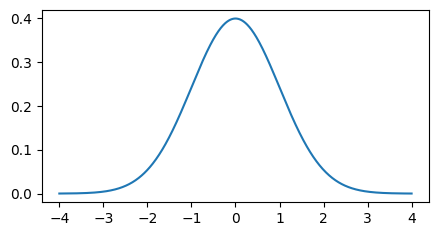

In [4]:
plt.figure(figsize=(5, 2.5))
xs = np.linspace(-4, 4, 1000)
ys = norm.pdf(xs)
plt.plot(xs, ys)
plt.show()

This distribution has $\mu=0$ and $\sigma=1$.  Suppose we want to to find where the middle 95% of the probability mass is distributed:

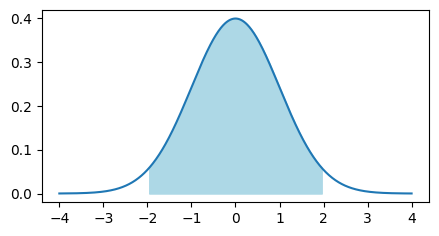

In [5]:
plt.figure(figsize=(5, 2.5))
xs = np.linspace(-4, 4, 1000)
ys = norm.pdf(xs)
plt.plot(xs, ys)
plt.fill_between(xs[np.abs(xs) <= 1.96], ys[np.abs(xs) <= 1.96], 0, color='lightblue')
plt.show()

This region extends from -1.96 to 1.96.  We can see this by using the normal distribution's {term}`cumulative distribution function`:

In [6]:
norm.cdf(-1.96)

0.024997895148220435

That's 0.025, the number we derived above for the left tail from the central 95% of mass.  Let's see 1.96:

In [7]:
norm.cdf(1.96)

0.9750021048517795

0.975 should look familiar.  Now, we can use the formula for the probability mass of an interval to confirm the mass of the interval from -1.96 to 1.96 is 0.95:

In [8]:
norm.cdf(1.96) - norm.cdf(-1.96)

0.950004209703559

We can also derive these values using the *inverse CDF*, accessible as the `ppf` method:

In [9]:
norm.ppf([0.025, 0.975])

array([-1.95996398,  1.95996398])

The normal distribution is a *scale-location* distribution, so the general form of the central 95% interval is $\mu \pm 1.96 \sigma$.